# NASA DATASET

In [89]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import classification_report, roc_auc_score, roc_curve, accuracy_score
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
import pandas as pd
from scipy import stats
import numpy as np
from openml import datasets

# Fetch the task and dataset

dataset = datasets.get_dataset(1067)
data, target, _, _ = dataset.get_data(dataset_format="dataframe")


In [90]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import seaborn as sns
import warnings

warnings.filterwarnings('ignore')

plt.style.use('ggplot')



nasa_df = pd.DataFrame(data)

# Check the dataframe records and columns
print(nasa_df.head())
print(nasa_df.columns)


    loc  v(g)  ev(g)  iv(g)      n       v     l      d      i         e  ...  \
0   1.1   1.4    1.4    1.4    1.3    1.30  1.30   1.30   1.30      1.30  ...   
1   1.0   1.0    1.0    1.0    1.0    1.00  1.00   1.00   1.00      1.00  ...   
2  83.0  11.0    1.0   11.0  171.0  927.89  0.04  23.04  40.27  21378.61  ...   
3  46.0   8.0    6.0    8.0  141.0  769.78  0.07  14.86  51.81  11436.73  ...   
4  25.0   3.0    1.0    3.0   58.0  254.75  0.11   9.35  27.25   2381.95  ...   

   lOCode  lOComment  lOBlank  locCodeAndComment  uniq_Op  uniq_Opnd  \
0     2.0          2        2                  2      1.2        1.2   
1     1.0          1        1                  1      1.0        1.0   
2    65.0         10        6                  0     18.0       25.0   
3    37.0          2        5                  0     16.0       28.0   
4    21.0          0        2                  0     11.0       10.0   

   total_Op  total_Opnd  branchCount  defects  
0       1.2         1.2         

In [91]:
nasa_df.describe()

,loc,v(g),ev(g),iv(g),n,v,l,d,i,e,...,t,lOCode,lOComment,lOBlank,locCodeAndComment,uniq_Op,uniq_Opnd,total_Op,total_Opnd,branchCount
count,2109.000000,2109.000000,2109.000000,2109.000000,2109.000000,2109.000000,2109.000000,2109.000000,2109.000000,2109.000000,...,2109.00000,2109.000000,2109.000000,2109.000000,2109.000000,2109.000000,2109.000000,2109.000000,2109.000000,2109.000000
mean,20.372262,2.838028,1.674443,2.546420,49.829445,258.696719,0.319583,6.771242,21.240071,5242.386240,...,291.24504,14.525367,0.945946,1.759602,0.132764,7.631674,9.537316,31.043717,18.786724,4.665908
std,29.754442,3.900763,2.200659,3.375859,83.599874,516.317605,0.317029,7.863646,21.500367,17444.981211,...,969.16516,24.188302,3.085271,3.856850,0.704023,5.730347,12.195727,51.776056,32.074398,7.792206
min,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,3.000000,1.000000,1.000000,1.000000,4.000000,8.000000,0.080000,1.500000,5.330000,12.000000,...,0.67000,0.000000,0.000000,0.000000,0.000000,3.000000,1.000000,3.000000,1.000000,1.000000
50%,9.000000,1.000000,1.000000,1.000000,16.000000,57.060000,0.200000,3.500000,14.400000,213.970000,...,11.89000,5.000000,0.000000,0.000000,0.000000,6.000000,5.000000,10.000000,6.000000,1.000000
75%,24.000000,3.000000,1.000000,3.000000,58.000000,265.930000,0.670000,9.200000,29.850000,2276.020000,...,126.45000,17.000000,0.000000,2.000000,0.000000,11.000000,13.000000,36.000000,22.000000,5.000000
max,288.000000,45.000000,26.000000,45.000000,1106.000000,7918.820000,2.000000,53.750000,193.060000,324803.510000,...,18044.64000,262.000000,44.000000,58.000000,12.000000,37.000000,120.000000,678.000000,428.000000,89.000000


In [92]:
nasa_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2109 entries, 0 to 2108
Data columns (total 22 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   loc                2109 non-null   float64
 1   v(g)               2109 non-null   float64
 2   ev(g)              2109 non-null   float64
 3   iv(g)              2109 non-null   float64
 4   n                  2109 non-null   float64
 5   v                  2109 non-null   float64
 6   l                  2109 non-null   float64
 7   d                  2109 non-null   float64
 8   i                  2109 non-null   float64
 9   e                  2109 non-null   float64
 10  b                  2109 non-null   float64
 11  t                  2109 non-null   float64
 12  lOCode             2109 non-null   float64
 13  lOComment          2109 non-null   uint8  
 14  lOBlank            2109 non-null   uint8  
 15  locCodeAndComment  2109 non-null   uint8  
 16  uniq_Op            2109 

In [93]:
nasa_df.isnull().sum()

loc                  0
v(g)                 0
ev(g)                0
iv(g)                0
n                    0
v                    0
l                    0
d                    0
i                    0
e                    0
b                    0
t                    0
lOCode               0
lOComment            0
lOBlank              0
locCodeAndComment    0
uniq_Op              0
uniq_Opnd            0
total_Op             0
total_Opnd           0
branchCount          0
defects              0
dtype: int64

In [94]:
# Removing of duplicates
print(nasa_df.shape)
liver_df_uni = nasa_df.drop_duplicates()
liver_df_uni.shape

(2109, 22)


(1212, 22)

## Data Visualization

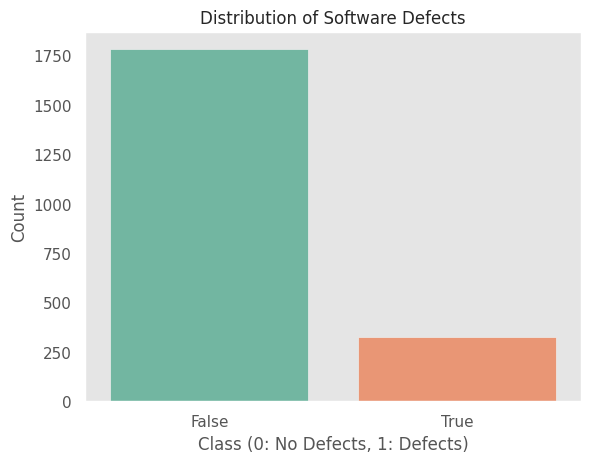

Number of instances with defects:  1783
Number of instances without defects:  326


In [95]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plot the distribution of defects in the NASA dataset
sns.countplot(data=nasa_df, x='defects', palette='Set2')
sns.set(style="whitegrid")
plt.title('Distribution of Software Defects')
plt.xlabel('Class (0: No Defects, 1: Defects)')
plt.ylabel('Count')
plt.grid(False)
plt.show()

# Count the number of instances with defects and those without defects
defects, no_defects = nasa_df['defects'].value_counts()
print('Number of instances with defects: ', defects)
print('Number of instances without defects: ', no_defects)

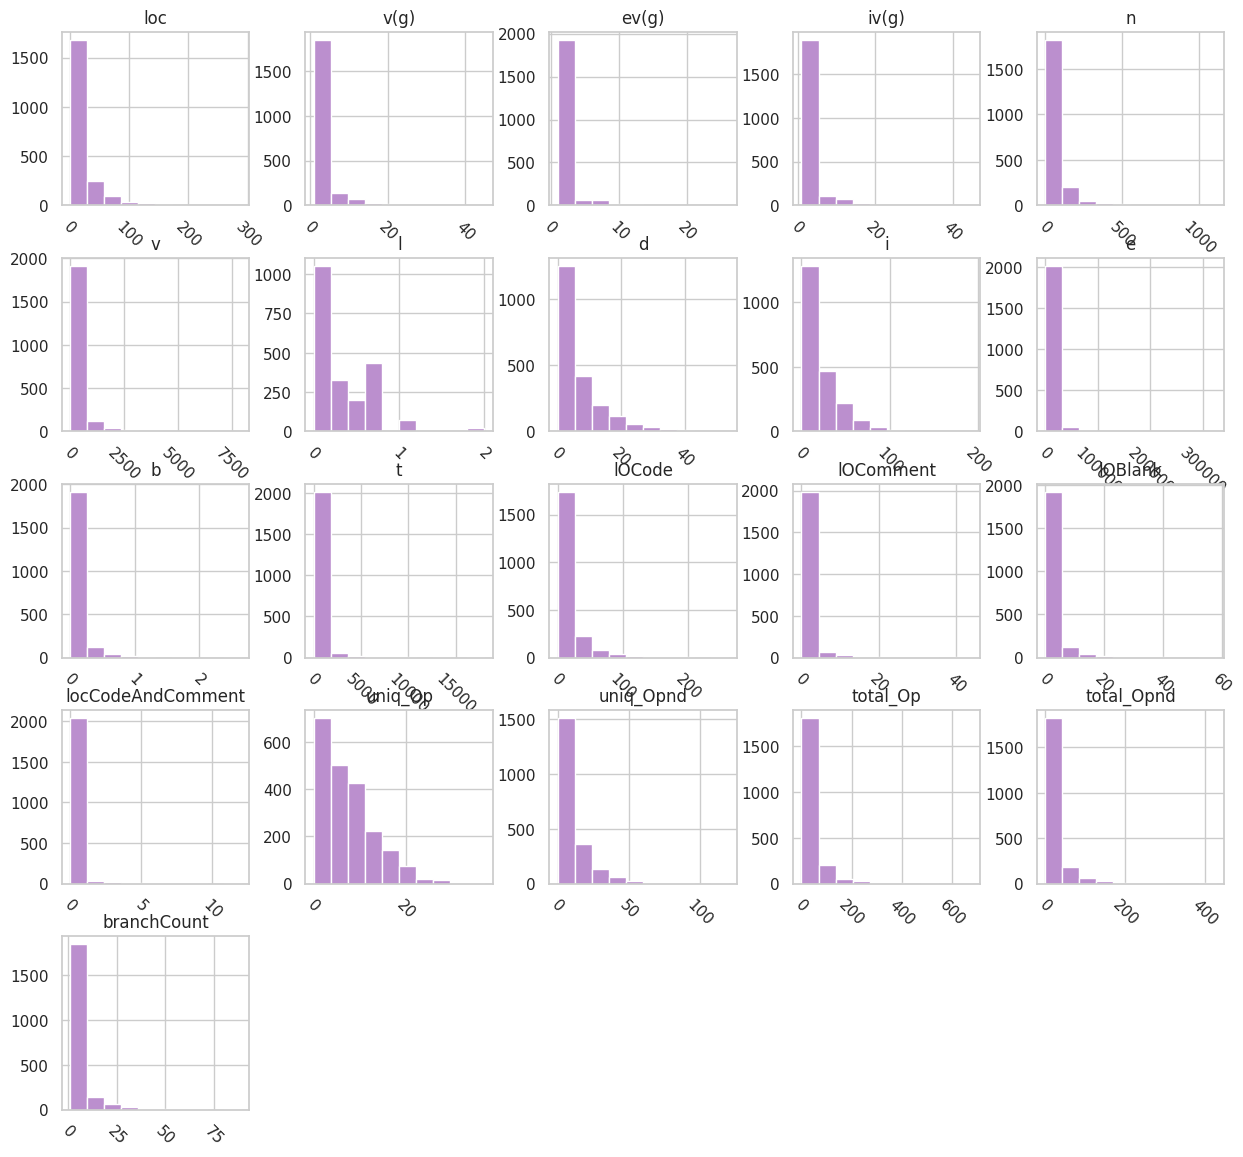

In [96]:
# Cheching for distribution

nasa_df.hist(figsize=(15, 14), xrot=-45, bins=10, color='#BB8FCE')
plt.show()

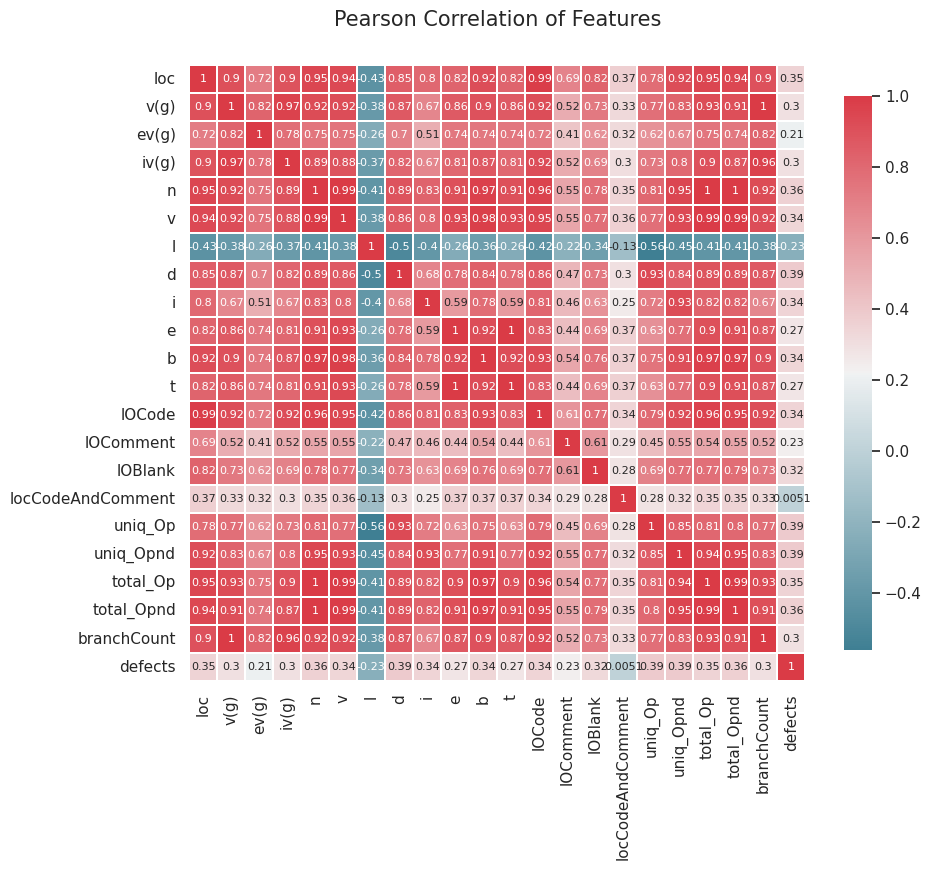

In [97]:
nasa_df.corr()

#Positive correlations -> one feature increases other also increases
#Negative correlations -> one feature increases other descreases
#close to 0 -> weak relationship

# Heatmap on correlation
def correlation_heatmap(df):
    _ , ax = plt.subplots(figsize =(10, 8))
    colormap = sns.diverging_palette(220, 10, as_cmap = True)

    _ = sns.heatmap(
        nasa_df.corr(),
        cmap = colormap,
        square=True,
        cbar_kws={'shrink':.9 },
        ax=ax,
        annot=True,
        linewidths=0.1,vmax=1.0, linecolor='white',
        annot_kws={'fontsize':8 }
    )

    plt.title('Pearson Correlation of Features', y=1.05, size=15)

correlation_heatmap(nasa_df)

Since this dataset clearly has a strong correlation between the features, lets perform some feature reduction techniques to visualize the data in 2D.

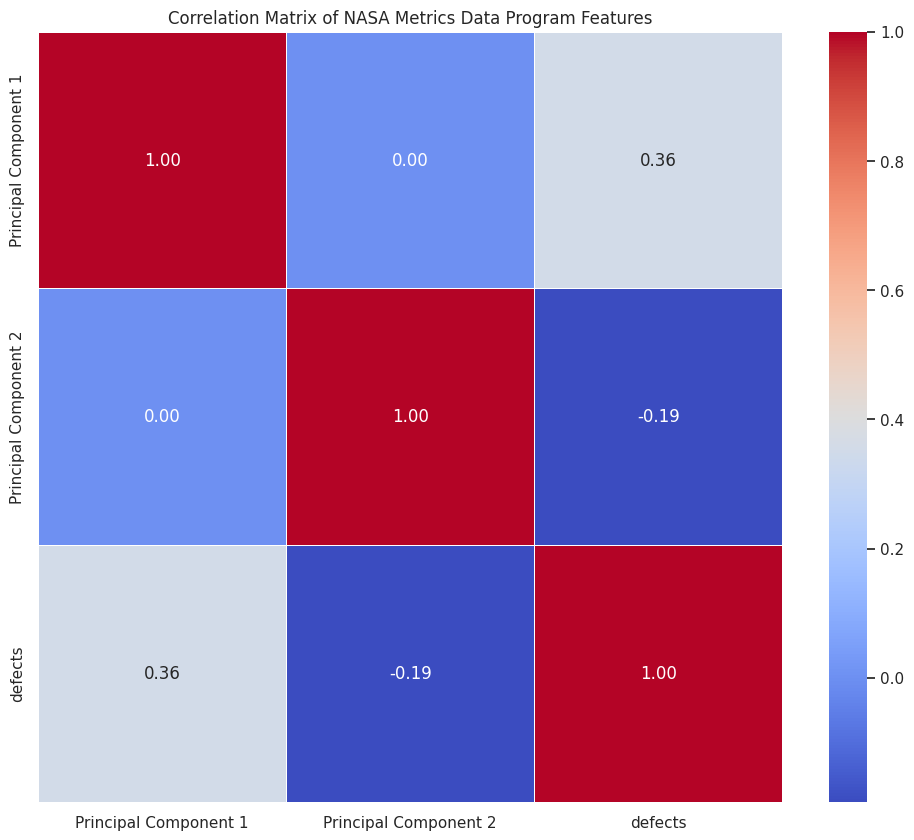

In [98]:
from sklearn.decomposition import PCA

# Standardize the data before applying PCA
features = nasa_df.drop(columns=['defects'])
features_standardized = StandardScaler().fit_transform(features)

# Apply PCA
pca = PCA(n_components=2)
principal_components = pca.fit_transform(features_standardized)

# Create a DataFrame with the principal components
pca_df = pd.DataFrame(data=principal_components, columns=['Principal Component 1', 'Principal Component 2'])
pca_df['defects'] = nasa_df['defects'].values

nasa_df = pca_df

correlation_matrix = nasa_df.corr()

# Plot the heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix of NASA Metrics Data Program Features')
plt.show()


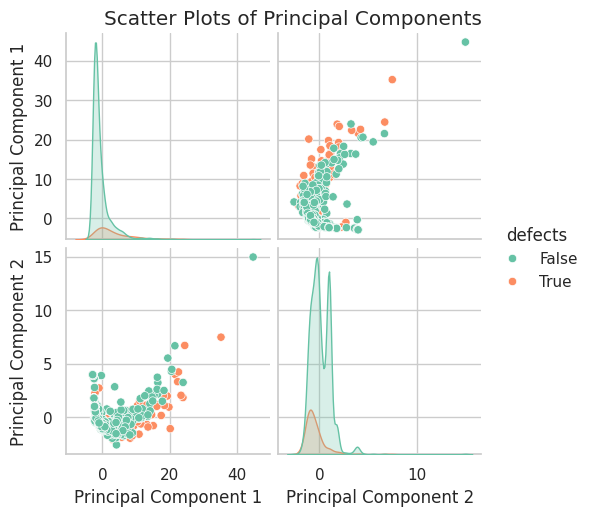

In [99]:

# Plot pairplot of the principal components
sns.pairplot(nasa_df, hue='defects', palette='Set2', diag_kind='kde')
plt.suptitle('Scatter Plots of Principal Components', y=1.02)
plt.show()

<Figure size 1200x1000 with 0 Axes>

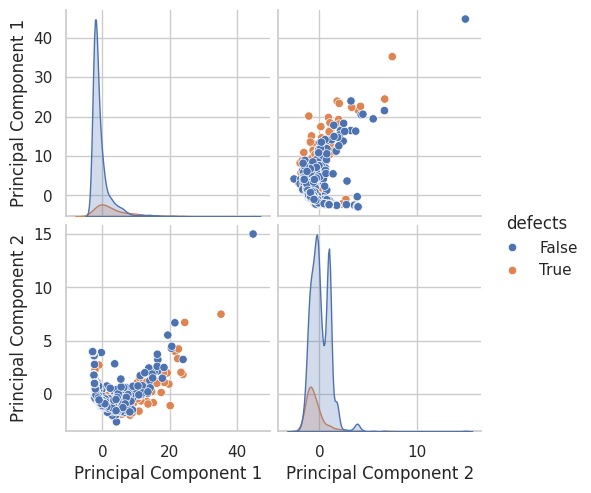

In [100]:
# Checking linearity of data on all features with pairplot
plt.figure(figsize=(12, 10))
sns.pairplot(nasa_df, hue='defects', diag_kind='kde')

# Save the figure with higher DPI for a clearer image
plt.savefig("pairplot_nasa.png", dpi=300, bbox_inches='tight')
plt.show()

## Prepare the Data for model and predictions

In [101]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.svm import SVC

X = nasa_df.drop(columns=['defects'])
y = nasa_df['defects']

# Divide the dataset to test and train datasets
X_train, X_test, y_train , y_test = train_test_split(X,y, test_size=0.2, random_state=0, stratify=y)

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(1687, 2)
(422, 2)
(1687,)
(422,)


accuracy_score: 0.8625592417061612
              precision    recall  f1-score   support

       False       0.87      0.99      0.92       357
        True       0.77      0.15      0.26        65

    accuracy                           0.86       422
   macro avg       0.82      0.57      0.59       422
weighted avg       0.85      0.86      0.82       422



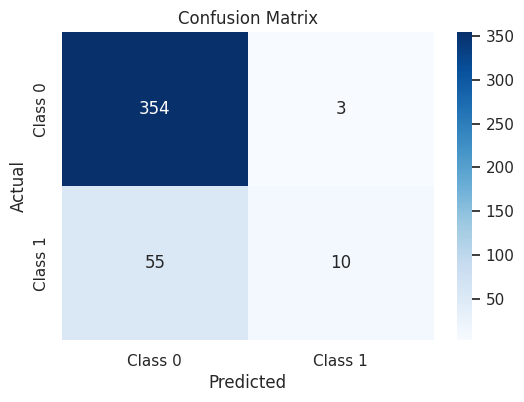

In [102]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.svm import SVC


classifier = SVC()
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)

print("accuracy_score:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

# Generate the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Visualize the confusion matrix using a heatmap
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Class 0', 'Class 1'], yticklabels=['Class 0', 'Class 1'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [103]:
from sklearn import metrics
from collections import Counter
from imblearn.over_sampling import RandomOverSampler, SMOTE, ADASYN
from imblearn.under_sampling import RandomUnderSampler
from imblearn.ensemble import BalancedBaggingClassifier, EasyEnsembleClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import classification_report

def model_boosting_resampling_pipeline(X_train, X_test, y_train, y_test, model):
    results = {
        'class_weight': {},
        'oversample': {},
        'undersample': {},
        'boosting': {}
    }

    # Class weight
    if 'class_weight' in model.get_params().keys():
        model.set_params(class_weight='balanced')
        model.fit(X_train, y_train)
        predictions = model.predict(X_test)
        accuracy = metrics.accuracy_score(y_test, predictions)
        precision, recall, fscore, support = metrics.precision_recall_fscore_support(y_test, predictions)
        tn, fp, fn, tp = metrics.confusion_matrix(y_test, predictions).ravel()
        fpr, tpr, thresholds = metrics.roc_curve(y_test, predictions, pos_label=1)
        auc = metrics.auc(fpr, tpr)

        results['class_weight'] = {
            'accuracy': accuracy, 'precision': precision, 'recall': recall,
            'fscore': fscore, 'n_occurences': support,
            'predictions_count': Counter(predictions),
            'tp': tp, 'tn': tn, 'fp': fp, 'fn': fn,
            'auc': auc
        }
        print("Results with Class Weight ('balanced'):")
        for key, value in results['class_weight'].items():
            print(f"{key}: {value}")
        print(classification_report(y_test, predictions))

    # Oversampling techniques
    oversampling_techniques = [RandomOverSampler(), SMOTE(), ADASYN()]
    for sampler in oversampling_techniques:
        technique = sampler.__class__.__name__
        print(f'Technique: {technique}')
        print(f'Before resampling: {sorted(Counter(y_train).items())}')
        X_resampled, y_resampled = sampler.fit_resample(X_train, y_train)
        print(f'After resampling: {sorted(Counter(y_resampled).items())}')

        model.fit(X_resampled, y_resampled)
        predictions = model.predict(X_test)
        accuracy = metrics.accuracy_score(y_test, predictions)
        precision, recall, fscore, support = metrics.precision_recall_fscore_support(y_test, predictions)
        tn, fp, fn, tp = metrics.confusion_matrix(y_test, predictions).ravel()
        fpr, tpr, thresholds = metrics.roc_curve(y_test, predictions, pos_label=1)
        auc = metrics.auc(fpr, tpr)

        results['oversample'][technique] = {
            'accuracy': accuracy,
            'precision': precision,
            'recall': recall,
            'fscore': fscore,
            'n_occurences': support,
            'predictions_count': Counter(predictions),
            'tp': tp, 'tn': tn, 'fp': fp, 'fn': fn,
            'auc': auc
        }
        print(f"Results with oversampling ({technique}):")
        for key, value in results['oversample'][technique].items():
            print(f"{key}: {value}")
        print(classification_report(y_test, predictions))

    # Undersampling techniques
    undersampling_techniques = [RandomUnderSampler()]
    for sampler in undersampling_techniques:
        technique = sampler.__class__.__name__
        print(f'Technique: {technique}')
        print(f'Before resampling: {sorted(Counter(y_train).items())}')
        X_resampled, y_resampled = sampler.fit_resample(X_train, y_train)
        print(f'After resampling: {sorted(Counter(y_resampled).items())}')

        model.fit(X_resampled, y_resampled)
        predictions = model.predict(X_test)
        accuracy = metrics.accuracy_score(y_test, predictions)
        precision, recall, fscore, support = metrics.precision_recall_fscore_support(y_test, predictions)
        tn, fp, fn, tp = metrics.confusion_matrix(y_test, predictions).ravel()
        fpr, tpr, thresholds = metrics.roc_curve(y_test, predictions, pos_label=1)
        auc = metrics.auc(fpr, tpr)

        results['undersample'][technique] = {
            'accuracy': accuracy,
            'precision': precision,
            'recall': recall,
            'fscore': fscore,
            'n_occurences': support,
            'predictions_count': Counter(predictions),
            'tp': tp, 'tn': tn, 'fp': fp, 'fn': fn,
            'auc': auc
        }
        print(f"Results with undersampling ({technique}):")
        for key, value in results['undersample'][technique].items():
            print(f"{key}: {value}")
        print(classification_report(y_test, predictions))

    # Boosting techniques
    boosting_techniques = [
        ('BalancedBagging', BalancedBaggingClassifier()),
        ('EasyEnsemble', EasyEnsembleClassifier()),
        ('GradientBoosting', GradientBoostingClassifier())
    ]

    for name, boosting_model in boosting_techniques:
        print(f'Boosting Technique: {name}')
        boosting_model.fit(X_train, y_train)
        predictions = boosting_model.predict(X_test)
        accuracy = metrics.accuracy_score(y_test, predictions)
        precision, recall, fscore, support = metrics.precision_recall_fscore_support(y_test, predictions)
        tn, fp, fn, tp = metrics.confusion_matrix(y_test, predictions).ravel()
        fpr, tpr, thresholds = metrics.roc_curve(y_test, predictions, pos_label=1)
        auc = metrics.auc(fpr, tpr)

        results['boosting'][name] = {
            'accuracy': accuracy,
            'precision': precision,
            'recall': recall,
            'fscore': fscore,
            'n_occurences': support,
            'predictions_count': Counter(predictions),
            'tp': tp, 'tn': tn, 'fp': fp, 'fn': fn,
            'auc': auc
        }
        print(f"Results with boosting ({name}):")
        for key, value in results['boosting'][name].items():
            print(f"{key}: {value}")
        print(classification_report(y_test, predictions))

    return results


In [104]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC

# Define the parameter grid for SVM
param_grid = {
    'C': [0.1, 1],
    'kernel': ['linear', 'rbf', 'poly', 'sigmoid'],
    'gamma': ['scale', 'auto']
}

# Create an SVM classifier
svc = SVC(random_state=0)

# Create a GridSearchCV object
grid_search = GridSearchCV(estimator=svc, param_grid=param_grid, cv=5, n_jobs=-1, scoring='accuracy')

# Perform grid search on the training data
grid_search.fit(X_train, y_train)

# Get the best estimator
best_svc = grid_search.best_estimator_

# Evaluate the best model on the test data
results = model_boosting_resampling_pipeline(X_train, X_test, y_train, y_test, best_svc)

# Print the best parameters and the results
print(f'Best Parameters: {grid_search.best_params_}')
print(f'Best SVC Model: {best_svc}')


Results with Class Weight ('balanced'):
accuracy: 0.6635071090047393
precision: [0.9535865  0.29189189]
recall: [0.63305322 0.83076923]
fscore: [0.76094276 0.432     ]
n_occurences: [357  65]
predictions_count: Counter({np.False_: 237, np.True_: 185})
tp: 54
tn: 226
fp: 131
fn: 11
auc: 0.7319112260288732
              precision    recall  f1-score   support

       False       0.95      0.63      0.76       357
        True       0.29      0.83      0.43        65

    accuracy                           0.66       422
   macro avg       0.62      0.73      0.60       422
weighted avg       0.85      0.66      0.71       422

Technique: RandomOverSampler
Before resampling: [(False, 1426), (True, 261)]
After resampling: [(False, 1426), (True, 1426)]
Results with oversampling (RandomOverSampler):
accuracy: 0.7037914691943128
precision: [0.953125   0.31927711]
recall: [0.68347339 0.81538462]
fscore: [0.79608483 0.45887446]
n_occurences: [357  65]
predictions_count: Counter({np.False_: 256,

In [105]:
model = SVC(kernel = 'poly', degree = 4)
results = model_boosting_resampling_pipeline(X_train, X_test, y_train, y_test, model)

Results with Class Weight ('balanced'):
accuracy: 0.8625592417061612
precision: [0.87848101 0.62962963]
recall: [0.9719888  0.26153846]
fscore: [0.92287234 0.36956522]
n_occurences: [357  65]
predictions_count: Counter({np.False_: 395, np.True_: 27})
tp: 17
tn: 347
fp: 10
fn: 48
auc: 0.6167636285283343
              precision    recall  f1-score   support

       False       0.88      0.97      0.92       357
        True       0.63      0.26      0.37        65

    accuracy                           0.86       422
   macro avg       0.75      0.62      0.65       422
weighted avg       0.84      0.86      0.84       422

Technique: RandomOverSampler
Before resampling: [(False, 1426), (True, 261)]
After resampling: [(False, 1426), (True, 1426)]
Results with oversampling (RandomOverSampler):
accuracy: 0.8554502369668247
precision: [0.87563452 0.57142857]
recall: [0.96638655 0.24615385]
fscore: [0.91877497 0.34408602]
n_occurences: [357  65]
predictions_count: Counter({np.False_: 394, n